In [22]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
house_data = pd.read_csv('./data/house_data_final.csv', low_memory=False)
house_data.head()

,URL,Adresse,Pris,Type,Energimærke,Ejerudgift,Boligydelse,Anvendelse,Boligtype,Enhedsareal,...,Boligenhed uden eget køkken,Matrikelnummer,Kommunal ejerlav navn,Grundstørrelse,Lands ejerlav kode,Vejareal,Lands ejerlav navn,Primær matrikel,Ejendomsnummer,Kommunal ejerlav kode
0,https://www.boliga.dk/bolig/1729667/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.boliga.dk/bolig/1729730/fiskeparke...,Fiskeparken 25 Snaptun 7130 Juelsminde,295000,Andelsbolig,C,NaN,6374,Fritliggende enfamiliehus,Egentlig beboelseslejlighed boligenhed med ege...,111,...,0.0,11be,ØSTRUP BY GLUD,9924.0,1100452.0,245.0,ØSTRUP BY GLUD,J,16078.0,NaN
2,https://www.boliga.dk/bolig/1729669/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.boliga.dk/bolig/1729668/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.boliga.dk/bolig/1729682/fermparken...,Fermparken 1B 8860 Ulstrup,195000,Andelsbolig,C,NaN,6104,Række kæde eller dobbelthus lodret adskillelse...,Egentlig beboelseslejlighed boligenhed med ege...,105,...,0.0,30u,VELLEV BY VELLE,14120.0,791455.0,0.0,VELLEV BY VELLEV,J,16026.0,NaN


In [9]:
house_data.describe()

,Etager,Udhus,Boligstørrelse tinglyst,Boligstørrelse,Boligenhed uden eget køkken,Grundstørrelse,Lands ejerlav kode,Vejareal,Ejendomsnummer
count,38324.000000,38323.000000,38323.000000,38323.000000,38321.000000,33460.000000,3.346000e+04,33460.000000,33460.000000
mean,4.936906,1.375179,82.219111,217.122120,52.021398,5139.035923,9.251338e+05,70.745637,90558.290974
std,674.782694,9.690958,829.985476,443.344163,175.244483,20387.251318,6.378347e+05,468.210148,160395.708376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.005100e+04,0.000000,1.000000
25%,1.000000,0.000000,0.000000,91.000000,0.000000,701.000000,4.111530e+05,0.000000,9577.500000
50%,1.000000,0.000000,0.000000,126.000000,0.000000,938.000000,8.101530e+05,0.000000,23104.000000
75%,1.000000,0.000000,0.000000,176.000000,0.000000,1577.000000,1.340162e+06,0.000000,103148.000000
max,132100.000000,628.000000,68695.000000,30093.000000,8974.000000,877028.000000,2.008761e+06,21433.000000,999529.000000


In [10]:
house_data.info()
house_data['Pris'] = pd.to_numeric(house_data['Pris'], errors='coerce')
house_data['Værelser'] = pd.to_numeric(house_data['Værelser'], errors='coerce')
house_data['Antal toiletter'] = pd.to_numeric(house_data['Antal toiletter'], errors='coerce')
house_data['Antal badeværelser'] = pd.to_numeric(house_data['Antal badeværelser'], errors='coerce')
house_data['Ejerudgift'] = pd.to_numeric(house_data['Ejerudgift'], errors='coerce')
house_data['Enhedsareal'] = pd.to_numeric(house_data['Enhedsareal'], errors='coerce')
house_data['Beboelsesareal'] = pd.to_numeric(house_data['Beboelsesareal'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38537 entries, 0 to 38536
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   URL                          38520 non-null  object 
 1   Adresse                      38515 non-null  object 
 2   Pris                         38496 non-null  object 
 3   Type                         38450 non-null  object 
 4   Energimærke                  32518 non-null  object 
 5   Ejerudgift                   37743 non-null  object 
 6   Boligydelse                  725 non-null    object 
 7   Anvendelse                   38348 non-null  object 
 8   Boligtype                    38342 non-null  object 
 9   Enhedsareal                  38342 non-null  object 
 10  Beboelsesareal               38330 non-null  object 
 11  Værelser                     38330 non-null  object 
 12  Antal toiletter              38329 non-null  object 
 13  Badeforhold     

In [11]:
data = house_data
data.drop(['Matrikelnummer',
           'Kommunal ejerlav navn',
           'Lands ejerlav kode',
           'Vejareal',
           'Lands ejerlav navn',
           'Primær matrikel',
           'Ejendomsnummer',
           'Kommunal ejerlav kode',
           'Varmeinstallation',
           'Afvigende etager',
           'Objekt status',
           'Anvendelse',
           'Boligtype',
           'Badeforhold',
           'Køkkenforhold',
           'Boligenhed med eget køkken',
           'Boligenhed uden eget køkken',
           'Energikode',
           'Toiletforhold',
           'Ydervæg',
           'Tag',
           'Boligydelse',
           'Bygningsnummer',
           'Boligstørrelse tinglyst'], 'columns', inplace=True)
data

,URL,Adresse,Pris,Type,Energimærke,Ejerudgift,Enhedsareal,Beboelsesareal,Værelser,Antal toiletter,Antal badeværelser,Etager,Carport,Seneste ombygning,Udhus,Boligstørrelse BBR,Boligstørrelse,Grundstørrelse
0,https://www.boliga.dk/bolig/1729667/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,395655.0,Andelsbolig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.boliga.dk/bolig/1729730/fiskeparke...,Fiskeparken 25 Snaptun 7130 Juelsminde,295000.0,Andelsbolig,C,NaN,111.0,111.0,4.0,1.0,1.0,1.0,39,0,0.0,150,150.0,9924.0
2,https://www.boliga.dk/bolig/1729669/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,395655.0,Andelsbolig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.boliga.dk/bolig/1729668/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,395655.0,Andelsbolig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.boliga.dk/bolig/1729682/fermparken...,Fermparken 1B 8860 Ulstrup,195000.0,Andelsbolig,C,NaN,105.0,105.0,4.0,1.0,1.0,1.0,0,0,0.0,210,210.0,14120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38532,https://www.boliga.dk/bolig/146502/skolegade_1...,Skolegade 10 6971 Spjald,445000.0,Villa,NaN,996.0,60.0,60.0,3.0,1.0,0.0,1.0,0,0,0.0,60,60.0,453.0
38533,https://www.boliga.dk/bolig/151651/eskovvej_90...,Eskovvej 90 7870 Roslev,625000.0,Fritidshus,NaN,721.0,62.0,62.0,4.0,1.0,1.0,1.0,0,0,0.0,62,62.0,847.0
38534,https://www.boliga.dk/bolig/220290/gammel_faer...,Gammel Færgevej 115 Sillerslev 7990 Øster Assels,895000.0,Fritidshus,NaN,995.0,80.0,80.0,4.0,1.0,1.0,1.0,0,0,0.0,80,80.0,4000.0
38535,https://www.boliga.dk/bolig/128178/alkajavej_1...,Alkajavej 10 7673 Harboøre,1585000.0,Fritidshus,NaN,1976.0,103.0,103.0,4.0,2.0,2.0,1.0,0,0,0.0,103,103.0,2799.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38537 entries, 0 to 38536
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   URL                 38520 non-null  object 
 1   Adresse             38515 non-null  object 
 2   Pris                38461 non-null  float64
 3   Type                38450 non-null  object 
 4   Energimærke         32518 non-null  object 
 5   Ejerudgift          37720 non-null  float64
 6   Enhedsareal         38338 non-null  float64
 7   Beboelsesareal      38326 non-null  float64
 8   Værelser            38324 non-null  float64
 9   Antal toiletter     38327 non-null  float64
 10  Antal badeværelser  38323 non-null  float64
 11  Etager              38324 non-null  float64
 12  Carport             38324 non-null  object 
 13  Seneste ombygning   38323 non-null  object 
 14  Udhus               38323 non-null  float64
 15  Boligstørrelse BBR  38323 non-null  object 
 16  Boli

In [13]:
villa_data = data[data['Type'] == 'Villa']

In [14]:
# Find missing values in the data and drop those rows:
print('rows before drop n/a',len(villa_data))
bool_matrix = villa_data.isnull() # dataframe with True and False values for each cell in the villa_data
only_null_filter = bool_matrix.any(axis=1) # is there a True value in any column in each row. returns a pandas Series with index matching index of villa dataframe
missing = villa_data[only_null_filter] # show all rows that has one or more null values
villa_data = villa_data.dropna()
print('rows after',len(villa_data))
#pd.options.display.max_rows = None # let me see all rows in the dataframe (can be used with columns too)
#villa_data
#bool_matrix

rows before drop n/a 23742
rows after 23181


In [15]:
villa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23181 entries, 8 to 38529
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   URL                 23181 non-null  object 
 1   Adresse             23181 non-null  object 
 2   Pris                23181 non-null  float64
 3   Type                23181 non-null  object 
 4   Energimærke         23181 non-null  object 
 5   Ejerudgift          23181 non-null  float64
 6   Enhedsareal         23181 non-null  float64
 7   Beboelsesareal      23181 non-null  float64
 8   Værelser            23181 non-null  float64
 9   Antal toiletter     23181 non-null  float64
 10  Antal badeværelser  23181 non-null  float64
 11  Etager              23181 non-null  float64
 12  Carport             23181 non-null  object 
 13  Seneste ombygning   23181 non-null  object 
 14  Udhus               23181 non-null  float64
 15  Boligstørrelse BBR  23181 non-null  object 
 16  Boli

In [16]:
villa_data.columns

Index(['URL', 'Adresse', 'Pris', 'Type', 'Energimærke', 'Ejerudgift',
       'Enhedsareal', 'Beboelsesareal', 'Værelser', 'Antal toiletter',
       'Antal badeværelser', 'Etager', 'Carport', 'Seneste ombygning', 'Udhus',
       'Boligstørrelse BBR', 'Boligstørrelse', 'Grundstørrelse'],
      dtype='object')

In [17]:
villa_data.describe()

,Pris,Ejerudgift,Enhedsareal,Beboelsesareal,Værelser,Antal toiletter,Antal badeværelser,Etager,Udhus,Boligstørrelse,Grundstørrelse
count,2.318100e+04,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000,23181.000000
mean,2.275412e+06,2457.084207,161.731591,156.900910,5.093956,1.656960,1.359389,1.033303,1.497476,134.747207,2105.613218
std,2.310348e+06,1671.001770,68.717857,58.593971,1.794770,0.687185,0.585669,0.186966,9.810150,62.076695,7754.166000
min,1.450000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.025000e+06,1610.000000,123.000000,122.000000,4.000000,1.000000,1.000000,1.000000,0.000000,96.000000,700.000000
50%,1.695000e+06,2093.000000,152.000000,150.000000,5.000000,2.000000,1.000000,1.000000,0.000000,125.000000,870.000000
75%,2.748000e+06,2781.000000,186.000000,184.000000,6.000000,2.000000,2.000000,1.000000,0.000000,161.000000,1198.000000
max,5.950000e+07,62140.000000,2764.000000,1442.000000,46.000000,19.000000,9.000000,4.000000,282.000000,2764.000000,308376.000000


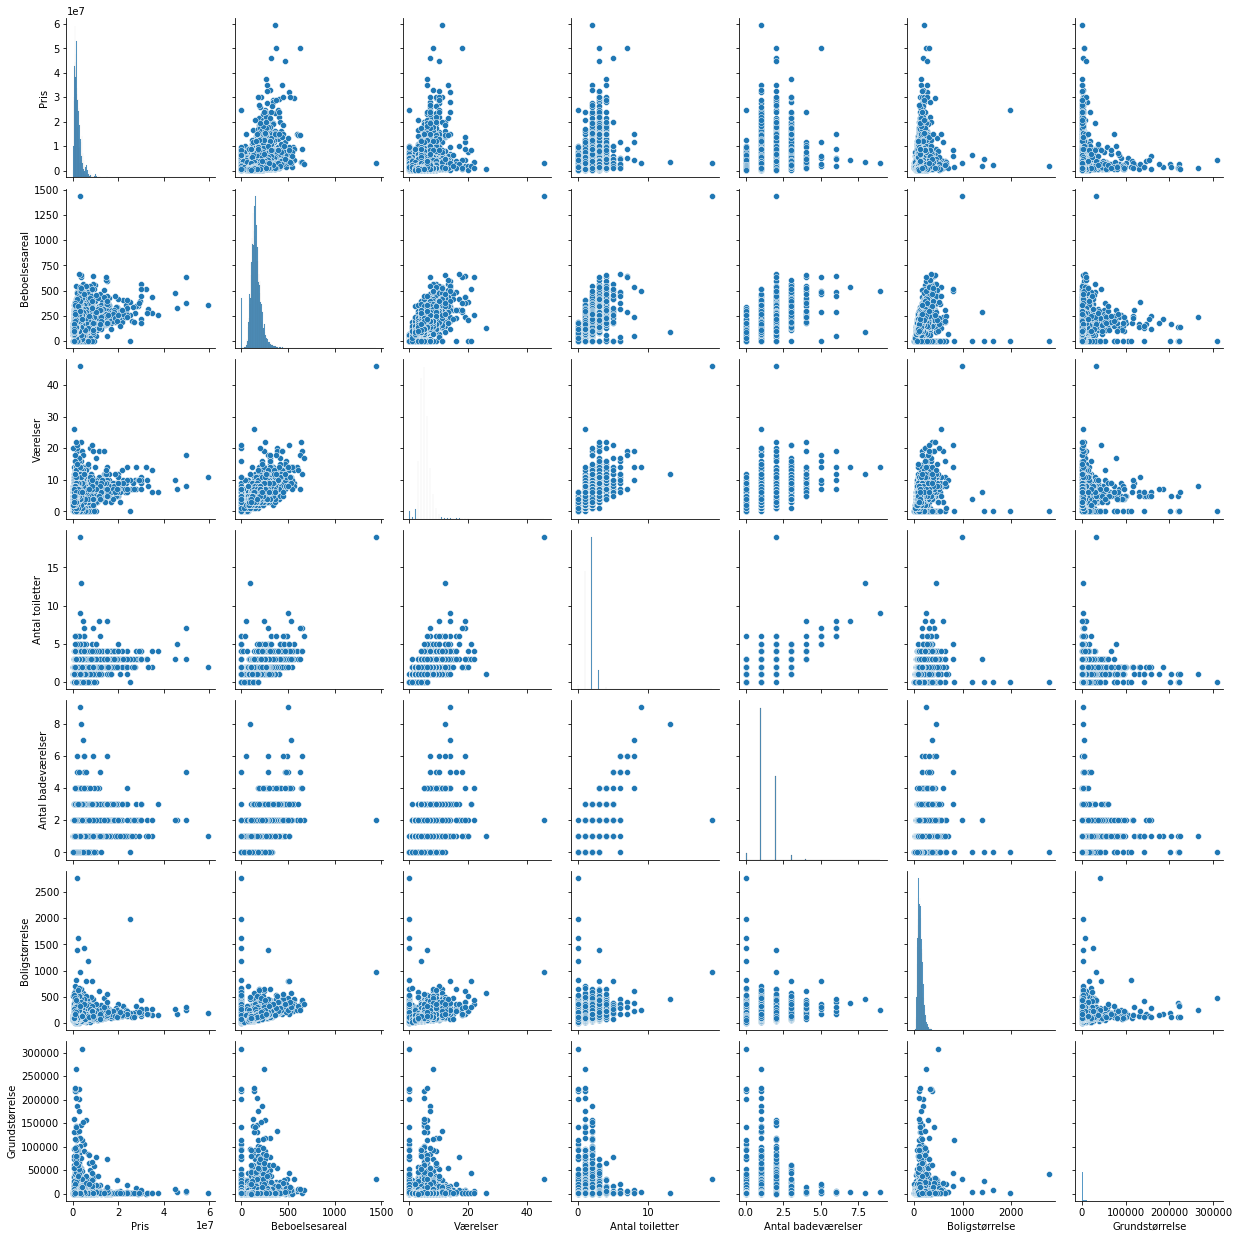

In [18]:
sb.pairplot(villa_data, vars=['Pris', 'Beboelsesareal', 'Værelser', 'Antal toiletter', 'Antal badeværelser', 'Boligstørrelse', 'Grundstørrelse'])

In [19]:
villa_data.corr()

,Pris,Ejerudgift,Enhedsareal,Beboelsesareal,Værelser,Antal toiletter,Antal badeværelser,Etager,Udhus,Boligstørrelse,Grundstørrelse
Pris,1.000000,0.874791,0.321718,0.345780,0.238814,0.335900,0.303963,0.215054,0.006252,0.234761,0.024421
Ejerudgift,0.874791,1.000000,0.332575,0.333629,0.239905,0.324871,0.281965,0.179901,0.002905,0.253146,0.020507
Enhedsareal,0.321718,0.332575,1.000000,0.745734,0.584534,0.437569,0.354157,0.141498,0.066492,0.743434,0.154726
Beboelsesareal,0.345780,0.333629,0.745734,1.000000,0.737705,0.570585,0.514284,0.130403,0.082601,0.475516,0.062860
Værelser,0.238814,0.239905,0.584534,0.737705,1.000000,0.511394,0.418472,0.108695,0.056753,0.337662,0.030014
Antal toiletter,0.335900,0.324871,0.437569,0.570585,0.511394,1.000000,0.670147,0.118135,0.034467,0.297992,-0.040622
Antal badeværelser,0.303963,0.281965,0.354157,0.514284,0.418472,0.670147,1.000000,0.072709,0.047864,0.286781,-0.026262
Etager,0.215054,0.179901,0.141498,0.130403,0.108695,0.118135,0.072709,1.000000,0.003762,-0.009058,-0.013979
Udhus,0.006252,0.002905,0.066492,0.082601,0.056753,0.034467,0.047864,0.003762,1.000000,0.233506,0.019070
Boligstørrelse,0.234761,0.253146,0.743434,0.475516,0.337662,0.297992,0.286781,-0.009058,0.233506,1.000000,0.133239


<AxesSubplot:>

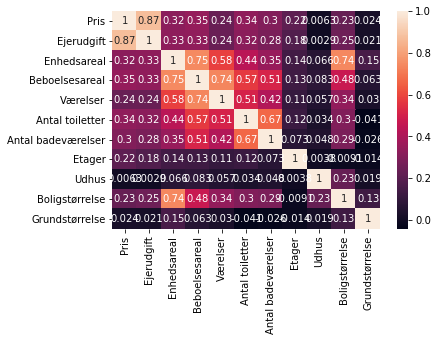

In [20]:
sb.heatmap(villa_data.corr(), annot=True)

In [21]:
test = villa_data[villa_data['Antal toiletter'] > 9]
#est = villa_data[villa_data['Værelser'] > 15]
test

,URL,Adresse,Pris,Type,Energimærke,Ejerudgift,Enhedsareal,Beboelsesareal,Værelser,Antal toiletter,Antal badeværelser,Etager,Carport,Seneste ombygning,Udhus,Boligstørrelse BBR,Boligstørrelse,Grundstørrelse
34512,https://www.boliga.dk/bolig/1542712/klintholm_...,Klintholm Havnevej 4 4791 Borre,3695000.0,Villa,E,2335.0,559.0,88.0,12.0,13.0,8.0,1.0,0,1980,0.0,460,460.0,2008.0
34784,https://www.boliga.dk/bolig/1534185/roennovsho...,Rønnovsholmvej 12A 9800 Hjørring,3195000.0,Villa,D,8174.0,1900.0,1442.0,46.0,19.0,2.0,2.0,0,1971,0.0,1721,979.0,31375.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = villa_data[['Ejerudgift', 'Enhedsareal',
       'Beboelsesareal','Antal toiletter', 'Antal badeværelser',
       'Etager', 'Carport', 'Boligstørrelse BBR', 'Grundstørrelse']]
y = villa_data['Pris']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

lm = LinearRegression()
lm.fit(X_train, y_train)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [14]:
coeff_df

,Coefficient
Ejerudgift,1186.827884
Enhedsareal,229.888102
Beboelsesareal,1318.509975
Antal toiletter,57794.787051
Antal badeværelser,104122.911915
Etager,766282.881832
Carport,9114.335900
Boligstørrelse BBR,-466.245456
Grundstørrelse,3.342231


In [15]:
predictions = lm.predict(X_test)

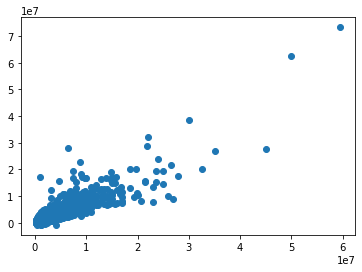

In [16]:
plt.scatter(y_test, predictions)

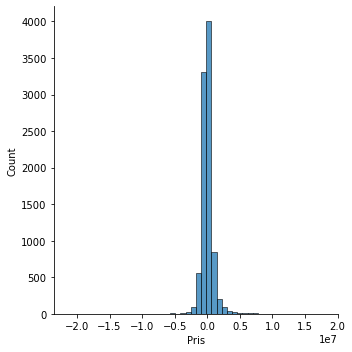

In [21]:
sb.displot((y_test-predictions), bins=50)